## Vectorization

In [131]:
import pandas as pd

In [132]:
corpus = pd.read_csv('finance_tweets_train.csv').drop(columns = ['Unnamed: 0'])
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9534 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


In [135]:
Train_df = pd.read_csv('sent_train.csv')
Train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [134]:
target_train_df = Train_df['label']
target_train_df

0       0
1       0
2       0
3       0
4       0
       ..
9538    2
9539    2
9540    2
9541    2
9542    2
Name: label, Length: 9543, dtype: int64

In [138]:
combined_df = pd.concat([corpus, target_train_df], axis =1)
combined_df.head()

,text,label
0,bynd jpmorgan reel expectation meat,0
1,ccl rcl nomura point booking weakness carnival...,0
2,cx cemex cut credit suisse morgan weak buildin...,0
3,es btig research cut neutral,0
4,fnko funko slide jaffray pt cut,0


Most common words for class label

Most common words for class text



In [125]:
corpus = corpus.dropna()
corpus

,text
0,bynd jpmorgan reel expectation meat
1,ccl rcl nomura point booking weakness carnival...
2,cx cemex cut credit suisse morgan weak buildin...
3,es btig research cut neutral
4,fnko funko slide jaffray pt cut
...,...
9538,week gainer loser stoxx europe economy markets...
9539,tupperware brand consumer gainer unilever lead...
9540,vtv therapeutic lead healthcare gainer myomo b...
9541,work xpo pyx amkr hour mover


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
vec = CountVectorizer()
X_train = vec.fit_transform(corpus['text'])
countvec_df = pd.DataFrame(X_train.toarray(), columns=vec.get_feature_names())

In [31]:
countvec_df.shape

(9534, 11880)

## Topic Modeling

In [81]:
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import numpy as np

In [115]:
topic_model = NMF(n_components = 3)
topic_model.fit(X_train)

NMF(n_components=3)

In [116]:
H = topic_model.transform(X_train)
W = topic_model.components_

In [117]:
W

array([[6.07036341e-04, 4.07942945e-03, 4.16695082e-03, ...,
        0.00000000e+00, 2.98040379e-05, 5.55113349e-05],
       [4.09969395e-05, 8.62466537e-05, 0.00000000e+00, ...,
        3.55297048e-03, 1.94810935e-04, 8.44666352e-05],
       [1.13585761e-04, 2.87672765e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.53912920e-04, 1.23688708e-04]])

In [118]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vec.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['get', 'share', 'cut', 'china', 'new', 'read', 'good', 'oil', 'open', 'deal', 'news', 'say', 'gain', 'energy', 'economy', 'raise', 'high', 'trade', 'buy', 'target', 'price', 'update', 'marketscreener', 'market', 'stock']


THE TOP 10 WORDS FOR TOPIC #1
['seek', 'economy', 'analyst', 'group', 'preview', 'update', 'read', 'fourth', 'get', 'say', 'new', 'year', 'financial', 'quarter', 'edited', 'ceo', 'edit', 'report', 'gmt', 'conference', 'presentation', 'transcript', 'result', 'call', 'earnings']


THE TOP 10 WORDS FOR TOPIC #2
['oil', 'expectation', 'profit', 'global', 'investment', 'factset', 'total', 'cent', 'group', 'report', 'forecast', 'sale', 'growth', 'rev', 'estimate', 'consensus', 'year', 'analyst', 'say', 'share', 'new', 'miss', 'eps', 'revenue', 'beat']




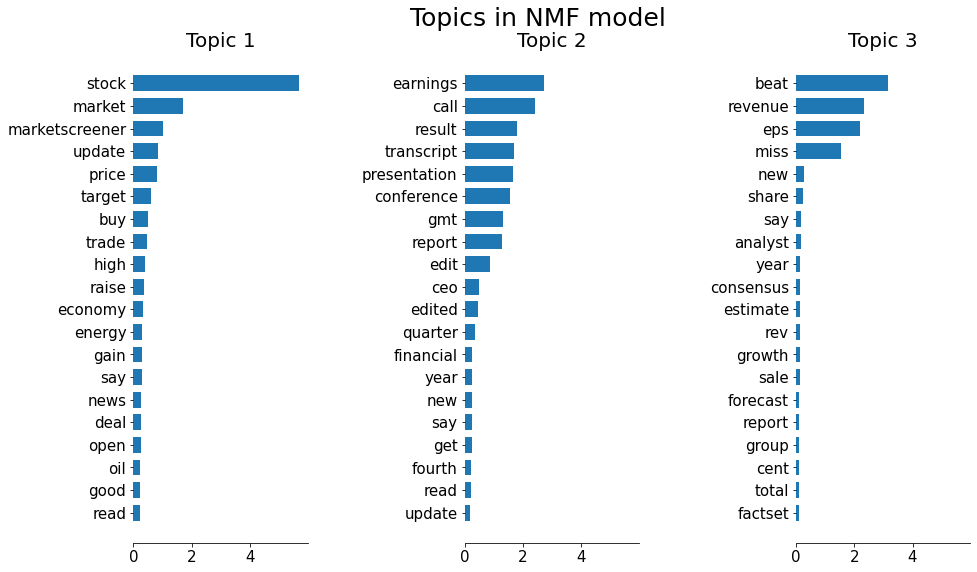

In [119]:
import matplotlib.pyplot as plt
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vec.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

In [120]:
topic_name_dict = {0: 'Stocks', 1: 'Earnings Report', 2: 'Company/Stock Evaluation'}
import seaborn as sns
def tweet_topbreakdown(locator):

    print(corpus.loc[locator].text)
    int_index = corpus.index.get_loc(locator)

    topic_keys = topic_name_dict.values()
    zipped_tuple = list(zip(topic_keys, list(H[int_index,:])))

    topic_breakdown = pd.DataFrame(zipped_tuple, columns = ['Topic', 'Weight']).set_index(['Topic'])
    topic_breakdown['Normalized weight'] = topic_breakdown['Weight']/topic_breakdown['Weight'].sum()

    sns.barplot(y = topic_breakdown.index, x = 'Normalized weight', data = topic_breakdown)
    plt.title("Distribution of topics for tweet no. " + str(locator))
    plt.show()

    return topic_breakdown

bynd jpmorgan reel expectation meat


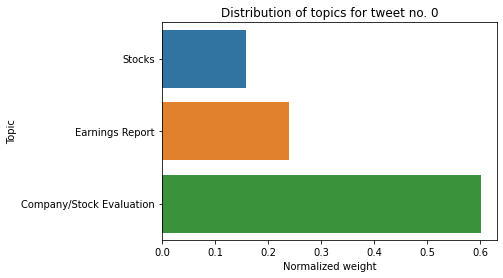

gtt cowen cut market perform


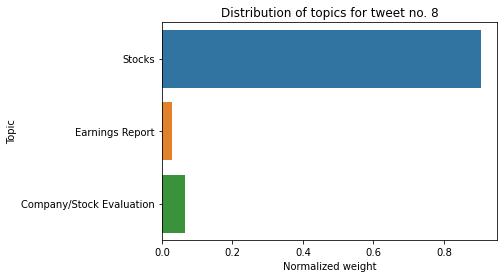

alphabet facebook price target cut barclays weak ad outlook


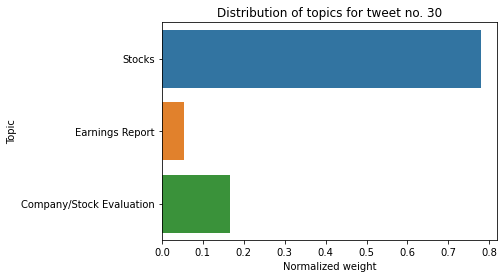

canada goose stock price target cut cfra


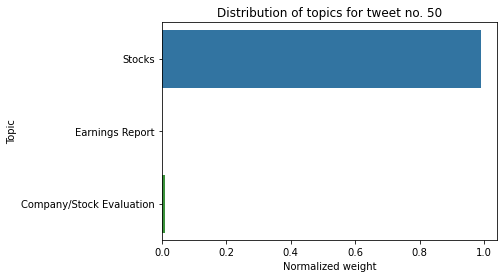

napco security stock price target cut imperial capital


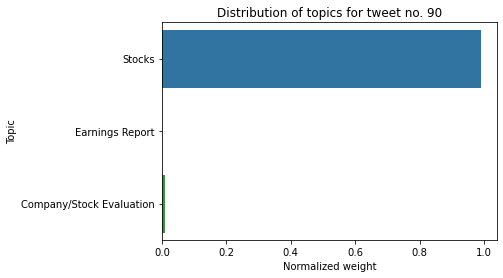

In [121]:
tweet_loc_list = [0,8, 30, 50, 90]
g = list(map(tweet_topbreakdown, tweet_loc_list))

In [122]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [123]:
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

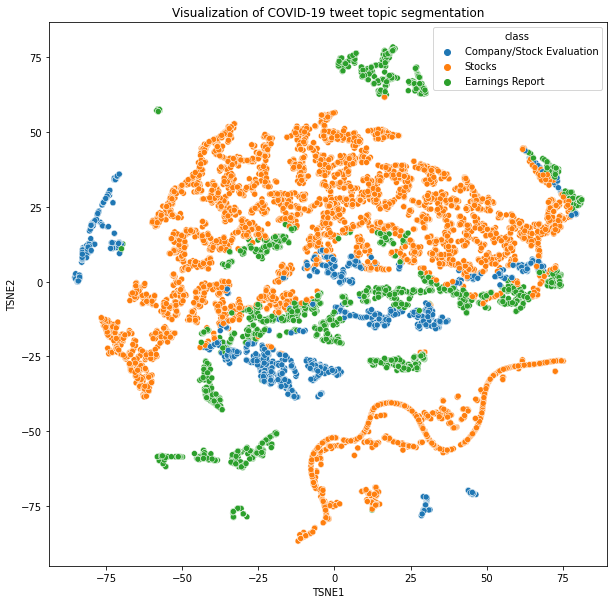

In [124]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of COVID-19 tweet topic segmentation')
plt.show()